**Nombre: Cristhian Henry Mamani Acero || Codigo:160328**

**SVM de una clase con kernel no lineal (RBF):**
La SVM de una clase es un algoritmo no supervisado que estima valores atípicos en un conjunto de datos.


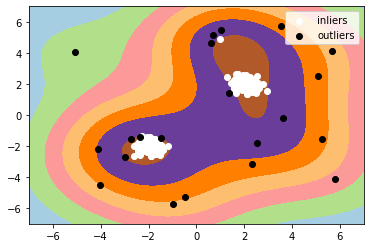

In [1]:
import numpy as np
import pylab as pl
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
X = 0.3 * np.random.randn(100, 2)
X = np.r_[X + 2, X - 2]

# Añadimos el 10% de los valores atípicos (lleva a nu=0,1)
X = np.r_[X, np.random.uniform(low=-6, high=6, size=(20, 2))]

# Ajustamos el modelo
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X)

# Trazamos la línea, los puntos y los vectores más cercanos al plano
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

pl.set_cmap(pl.cm.Paired)
pl.contourf(xx, yy, Z)
pl.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', label='inliers')
pl.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
pl.axis('tight')
pl.legend()
pl.show()